In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict(text, model, index_to_label, acronyms_to_entities, MAX_LENGTH):
	"""
	Predicts named entities in a text using a trained NER model.
	"""

	tokens, start_end_ranges = tokenize_text(text)
	all_tokens = []
	all_ranges = []
	for sent_tokens, sent_ranges in zip(tokens, start_end_ranges):
		for token, start_end in zip(sent_tokens, sent_ranges):
			start, end = start_end[0], start_end[1]
			all_tokens.append(token)
			all_ranges.append((start, end))

	sequence = tokenizer.texts_to_sequences([' '.join(token for token in all_tokens)])
	padded_sequence = pad_sequences(sequence, maxlen=MAX_LENGTH, padding='post')

	# Make the prediction
	prediction = model.predict(np.array(padded_sequence))

	# Decode the prediction
	predicted_labels = np.argmax(prediction, axis=-1)
	predicted_labels = [index_to_label[i] for i in predicted_labels[0]]

	entities = []
	start_char = 0
	for i, (token, label, start_end_range) in enumerate(zip(all_tokens, predicted_labels, all_ranges)):

		start = start_end_range[0]
		end = start_end_range[1]

		if label != 'O':
			entity_type = acronyms_to_entities[label[2:]]
			entity = (start, end, entity_type)
			entities.append(entity)

	# Print the predicted named entities
	print("Predicted Named Entities:")
	for i in range(len(all_tokens)):
		if predicted_labels[i] == 'O':
			print(f"{all_tokens[i]}: {predicted_labels[i]}")
		else:
			print(f"{all_tokens[i]}: {acronyms_to_entities[predicted_labels[i][2:]]}")

	display_pred(text, entities)

def display_pred(text, entities):
	nlp = spacy.load("en_core_web_sm", disable=['ner'])
	# Generate the entities in Spacy format
	doc = nlp(text)
	# Add the predicted named entities to the Doc object
	for start, end, label in entities:
		span = doc.char_span(start, end, label=label)
		if span is not None:
			doc.ents += tuple([span])

	colors = {"Activity": "#123456", "Administration": "#789abc", "Age": "#def123", "Area": "#456789", "Biological_attribute": "#abc456", "Biological_structure": "#123def", "Clinical_event": "#456abc", "Color": "#789def", "Coreference": "#abc123", "Date": "#def789",
          "Detailed_description": "#234567", "Diagnostic_procedure": "#890abc", "Disease_disorder": "#567890", "Distance": "#abc234", "Dosage": "#234def", "Duration": "#890456", "Family_history": "#567def", "Frequency": "#234789", "Height": "#890def", "History": "#567123",
          "Lab_value": "#890123", "Mass": "#567234", "Medication": "#123456", "Nonbiological_location": "#789abc", "Occupation": "#def123", "Other_entity": "#abc456", "Other_event": "#123def", "Outcome": "#456abc", "Personal_background": "#789def", "Qualitative_concept": "#abc123",
          "Quantitative_concept": "#def789", "Severity": "#234567", "Sex": "#890abc", "Shape": "#567890", "Sign_symptom": "#abc234", "Subject": "#234def", "Texture": "#890456", "Therapeutic_procedure": "#567def", "Time": "#234789", "Volume": "#890def", "Weight": "#567123"}
	options = {"compact": True, "bg": "#F8F8F8",
			   "ents": list(colors.keys()),
			   "colors": colors}

In [ ]:
from config import entity_to_acronyms,acronyms_to_entities,index_to_label
print(index_to_label)

{1: 'B-ACT', 2: 'B-ADM', 3: 'B-AGE', 4: 'B-ARA', 5: 'B-BAT', 6: 'B-BST', 7: 'B-CLE', 8: 'B-COL', 9: 'B-COR', 10: 'B-DAT', 11: 'B-DET', 12: 'B-DIA', 13: 'B-DIS', 14: 'B-DOS', 15: 'B-DUR', 16: 'B-FAM', 17: 'B-FRE', 18: 'B-HEI', 19: 'B-HIS', 20: 'B-LAB', 21: 'B-MAS', 22: 'B-MED', 23: 'B-NBL', 24: 'B-OCC', 25: 'B-OTE', 26: 'B-OTH', 27: 'B-OUT', 28: 'B-PER', 29: 'B-QUC', 30: 'B-SEV', 31: 'B-SEX', 32: 'B-SHA', 33: 'B-SIG', 34: 'B-SUB', 35: 'B-TEX', 36: 'B-THP', 37: 'B-TIM', 38: 'B-VOL', 39: 'B-WEI', 40: 'I-ACT', 41: 'I-ADM', 42: 'I-AGE', 43: 'I-ARA', 44: 'I-BAT', 45: 'I-BST', 46: 'I-CLE', 47: 'I-COL', 48: 'I-COR', 49: 'I-DAT', 50: 'I-DET', 51: 'I-DIA', 52: 'I-DIS', 53: 'I-DOS', 54: 'I-DUR', 55: 'I-FAM', 56: 'I-FRE', 57: 'I-HEI', 58: 'I-HIS', 59: 'I-LAB', 60: 'I-MAS', 61: 'I-MED', 62: 'I-NBL', 63: 'I-OCC', 64: 'I-OTE', 65: 'I-OTH', 66: 'I-OUT', 67: 'I-PER', 68: 'I-QUC', 69: 'I-SEV', 70: 'I-SHA', 71: 'I-SIG', 72: 'I-SUB', 73: 'I-TEX', 74: 'I-THP', 75: 'I-TIM', 76: 'I-VOL', 77: 'I-WEI', 78: 'O'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense

In [ ]:
from config import entity_to_acronyms, acronyms_to_entities

In [ ]:
data_dir = 'E:/project/annotated_dictionary'
model_dir = 'E:/project/models'

In [ ]:
(train_sequences_padded, train_labels), (val_sequences_padded, val_labels), (test_sequences_padded, test_labels), label_to_index, index_to_label = load_data(data_dir)

In [ ]:
if train_sequences_padded.shape[1] != train_labels.shape[1]:
    print('Sequence length mismatch')

In [ ]:
#defining the model parameters
INPUT_DIM = len(tokenizer.word_index)+1
EMBEDDING_DIM = 64
NUM_CLASSES = len(label_to_index)
MAX_LENGTH = train_sequences_padded.shape[1]

LSTM1_UNITS = 64
LSTM2_UNITS = 32
DENSE_DIM = 64

DROPOUT = 0.2
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
#Building Model
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    _precision = true_positives / (predicted_positives + K.epsilon())
    return _precision

def recall(y_true, y_pred):
    """Compute recall metric"""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def f1_score(y_true, y_pred):
    """Compute f1-score metric"""
    _precision = precision(y_true, y_pred)
    _recall = recall(y_true, y_pred)
    f1_score = 2 * ((_precision * _recall) / (_precision + _recall + K.epsilon()))
    return f1_score

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
    Embedding(INPUT_DIM, EMBEDDING_DIM, input_length=MAX_LENGTH),
    Bidirectional(LSTM(units=LSTM1_UNITS, return_sequences=True)),
    Bidirectional(LSTM(units=LSTM2_UNITS, return_sequences=True)),
    Dense(DENSE_DIM, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1_score])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           446016    
                                                                 
 bidirectional_6 (Bidirecti  (None, 100, 128)          66048     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 100, 64)           41216     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 100, 64)           4160      
                                                                 
 dense_7 (Dense)             (None, 100, 79)           5135      
                                                                 
Total params: 562575 (2.15 MB)
Trainable params: 56257

In [ ]:
# Train the model
history = model.fit(
    train_sequences_padded,
    train_labels,
    epochs=EPOCHS,
    validation_data=(val_sequences_padded, val_labels)
)

Epoch 1/100
95/95 [==============================] - 81s 700ms/step - loss: 1.0279 - accuracy: 0.8982 - precision: 0.7817 - recall: 0.7284 - f1_score: 0.7534 - val_loss: 0.4025 - val_accuracy: 0.9118 - val_precision: 0.9836 - val_recall: 0.8833 - val_f1_score: 0.9307
Epoch 2/100
95/95 [==============================] - 58s 606ms/step - loss: 0.3848 - accuracy: 0.9080 - precision: 0.9941 - recall: 0.8798 - f1_score: 0.9334 - val_loss: 0.3996 - val_accuracy: 0.9118 - val_precision: 0.9862 - val_recall: 0.8830 - val_f1_score: 0.9317
Epoch 3/100
95/95 [==============================] - 57s 601ms/step - loss: 0.3699 - accuracy: 0.9081 - precision: 0.9956 - recall: 0.8826 - f1_score: 0.9356 - val_loss: 0.4082 - val_accuracy: 0.9117 - val_precision: 0.9833 - val_recall: 0.8853 - val_f1_score: 0.9317
Epoch 4/100
95/95 [==============================] - 57s 600ms/step - loss: 0.3572 - accuracy: 0.9101 - precision: 0.9954 - recall: 0.8878 - f1_score: 0.9385 - val_loss: 0.4288 - val_accuracy: 0.9

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].plot(history.history['accuracy'])
    axs[0, 0].plot(history.history['val_accuracy'])
    axs[0, 0].set_title('Model Accuracy')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].legend(['train', 'val'], loc='best')

    axs[0, 1].plot(history.history['loss'])
    axs[0, 1].plot(history.history['val_loss'])
    axs[0, 1].set_title('Model Loss')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend(['train', 'val'], loc='best')

    axs[1, 0].plot(history.history['recall'])
    axs[1, 0].plot(history.history['val_recall'])
    axs[1, 0].set_title('Model Recall')
    axs[1, 0].set_ylabel('Recall')
    axs[1, 0].legend(['train', 'val'], loc='best')

    axs[1, 1].plot(history.history['f1_score'])
    axs[1, 1].plot(history.history['val_f1_score'])
    axs[1, 1].set_title('Model F1 Score')
    axs[1, 1].set_ylabel('F1 Score')
    axs[1, 1].legend(['train', 'val'], loc='best')

    plt.tight_layout()
    plt.show()


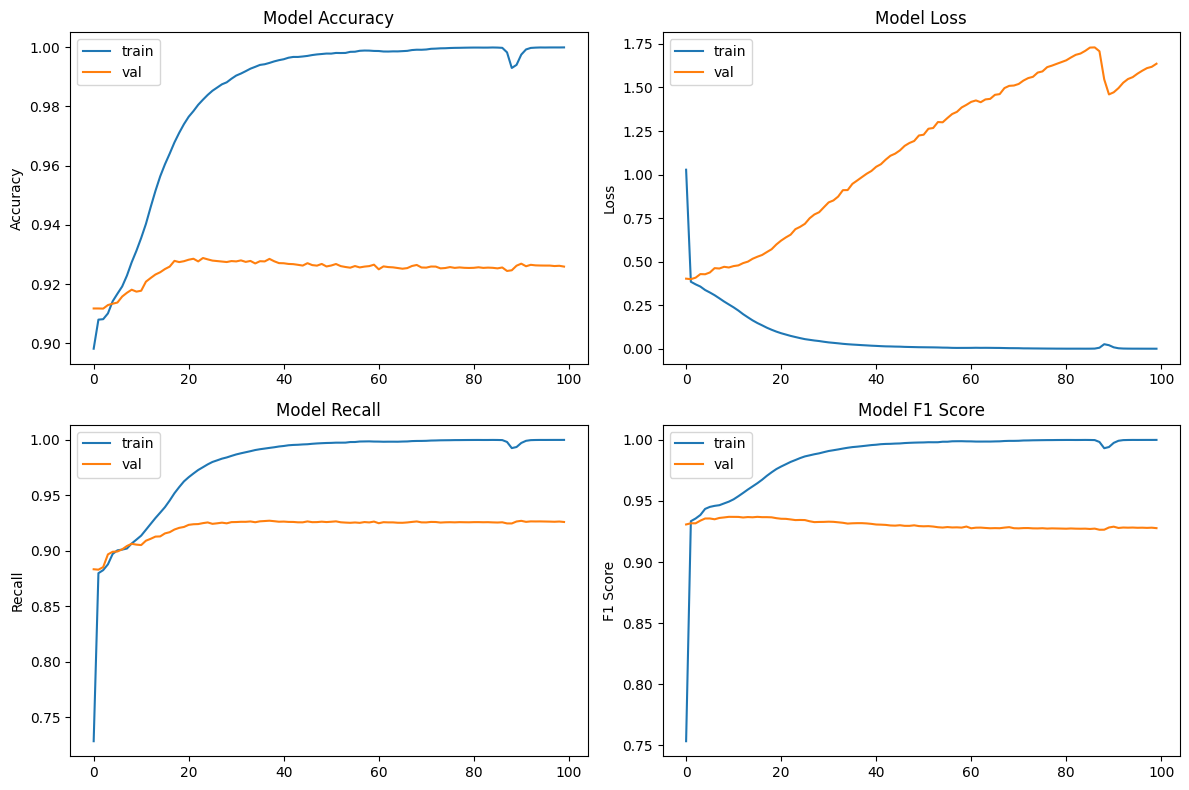

In [ ]:
# Plot the training history
plot_graphs(history)

In [ ]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = model.predict(test_sequences_padded)

# Convert the predictions from one-hot encoded format to the label format
y_pred_labels = np.argmax(y_pred, axis=2)
test_labels_labels = np.argmax(test_labels, axis=2)

# Print the classification report
print(classification_report(test_labels_labels.reshape(-1), y_pred_labels.reshape(-1), zero_division=0))


28/28 [==============================] - 8s 170ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.14      0.13      0.13        23
           3       0.87      0.94      0.90        35
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.41      0.42      0.41       465
           7       0.55      0.47      0.51       110
           8       0.25      0.08      0.12        13
           9       0.10      0.15      0.12        52
          10       0.44      0.41      0.42       127
          11       0.20      0.20      0.20       412
          12       0.45      0.48      0.46       725
          13       0.15      0.13      0.14       202
          14       0.29      0.17      0.21        96
          15       0.23      0.23      0.23        52
          16       0.10      0.15      0.12        13
          17       0.09   

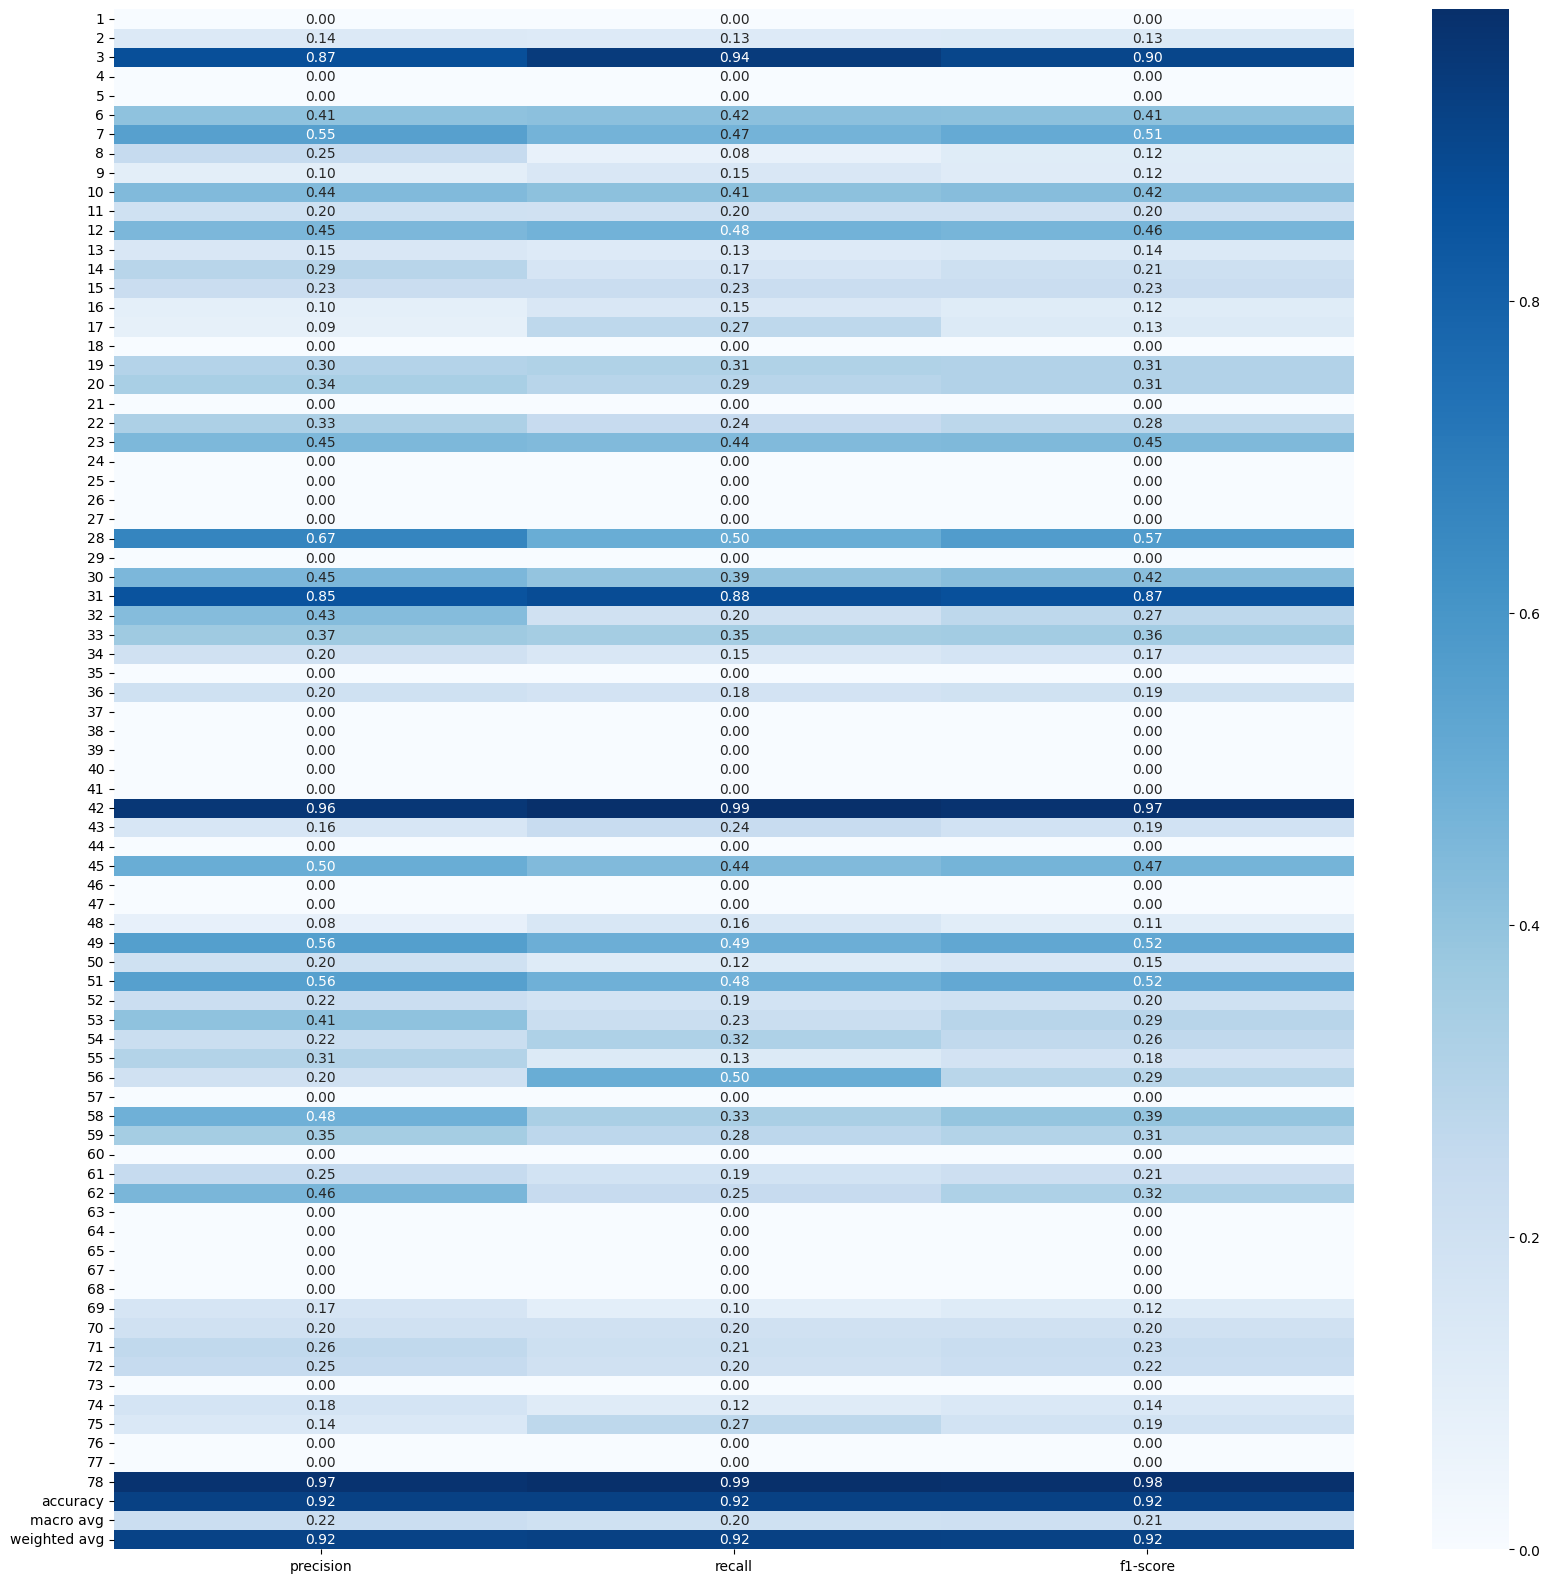

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

report = classification_report(test_labels_labels.reshape(-1), y_pred_labels.reshape(-1), zero_division=0, output_dict=True)
plt.subplots(figsize=(20, 20))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.show()


In [ ]:
#Save the model
model.save(os.path.join(model_dir, 'model_3.h5'))

C:\Users\Kaushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Register the custom metric function
tf.keras.utils.get_custom_objects()[precision.__name__] = precision
tf.keras.utils.get_custom_objects()[recall.__name__] = recall
tf.keras.utils.get_custom_objects()[f1_score.__name__] = f1_score

In [ ]:
#Load the model under the name model_3
model_3 = tf.keras.models.load_model(os.path.join(model_dir, 'model_3.h5'))

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model_2.evaluate(test_sequences_padded, test_labels)
# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test f1_score:', test_f1_score)


28/28 [==============================] - 5s 164ms/step - loss: 0.4165 - accuracy: 0.9044 - precision: 0.9837 - recall: 0.8778 - f1_score: 0.9277
Test loss: 0.4164760112762451
Test accuracy: 0.9044073820114136
Test precision: 0.9837307333946228
Test recall: 0.8778303861618042
Test f1_score: 0.9276677370071411


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [ ]:
predict(
    "A 57-year-old man presented to the emergency department with a 2-day history of worsening shortness of breath and chest pain. He reported no recent travel or sick contacts. His medical history was significant for hypertension, dyslipidemia, and type 2 diabetes mellitus. On examination, he was tachycardic and tachypneic, with oxygen saturation of 88% on room air. Chest radiography revealed bilateral opacities consistent with pulmonary edema. The patient was admitted to the intensive care unit for management of acute decompensated heart failure. He was started on intravenous diuretics and inotropic support with dobutamine. Over the next several days, his symptoms improved and he was discharged to home with instructions to follow up with his primary care provider in 1 week.",
    model_2,
    index_to_label,
    acronyms_to_entities,
    MAX_LENGTH
)

1/1 [==============================] - 1s 633ms/step
Predicted Named Entities:
57: Age
year: Age
old: Age
man: Sex
presented: Nonbiological_location
emergency: Nonbiological_location
department: History
2: Date
day: O
history: Sign_symptom
worsening: Sign_symptom
shortness: Biological_structure
breath: Sign_symptom
chest: O
pain: Nonbiological_location
reported: History
recent: History
travel: History
sick: History
contacts: History
medical: Nonbiological_location
history: Nonbiological_location
significant: History
hypertension: Nonbiological_location
dyslipidemia: Nonbiological_location
type: Nonbiological_location
2: Biological_structure
diabetes: Diagnostic_procedure
mellitus: Diagnostic_procedure
examination: Lab_value
tachycardic: Detailed_description
tachypneic: Detailed_description
oxygen: Biological_structure
saturation: Diagnostic_procedure
88: Detailed_description
room: O
air: Biological_structure
chest: Sign_symptom
radiography: O
revealed: Biological_structure
bilateral: B